In [1]:
%pylab inline
from numpy import *
from numpy.random import rand, randn, randint
from dPCA import dPCA
# sys.path.append('../ee_dpca.py');
import ee_dpca

# number of neurons, time-points and stimuli
N,T,S = 100,250,6

# noise-level and number of trials in each condition
noise, n_samples = 0.2, 10

# build two latent factors
zt = (arange(T)/float(T))
zs = (arange(S)/float(S))

# build trial-by trial data
trialR = noise*randn(n_samples,N,S,T)
trialR += randn(N)[None,:,None,None]*zt[None,None,None,:]
trialR += randn(N)[None,:,None,None]*zs[None,None,:,None]

# trial-average data
R = mean(trialR,0)

# center data
R -= mean(R.reshape((N,-1)),1)[:,None,None]


Populating the interactive namespace from numpy and matplotlib


In [2]:
print(trialR.shape)
print(R.shape)

(10, 100, 6, 250)


In [3]:
Ee_dpca=ee_dpca.EE_dPCA(labels='st',rho=8e-3, hyper_lamb=1e-4, hyper_tau=1e-2, regularizer=None)
Ee_dpca.protect = ['t']

ZZ = Ee_dpca.fit_transform(R,trialR)

original X.shape (100, 6, 250)
in _optimzie <class 'numpy.ndarray'>
start cross-val to get best lams
original X.shape (10, 100, 6, 250)


ValueError: operands could not be broadcast together with shapes (10,100,6,250) (10,1,1) 

In [4]:
'''ee_dpca_list=[]
ee_dpca_explained_var=[]
for i in range (15):
    print(i)
    ee = ee_dpca.EE_dPCA(labels='st',hyper_lamb=0.01,hyper_tau=0.1,rho=8e-3, regularizer=None,n_components=i+1)
    ee.protect = ['t']
    ZZ = ee.fit_transform(R,trialR)
    ee_dpca_explained_var.append(ee.explained_variance_ratio_)

print(ee_dpca_explained_var)

    
'''


"ee_dpca_list=[]\nee_dpca_explained_var=[]\nfor i in range (15):\n    print(i)\n    ee = ee_dpca.EE_dPCA(labels='st',hyper_lamb=0.01,hyper_tau=0.1,rho=8e-3, regularizer=None,n_components=i+1)\n    ee.protect = ['t']\n    ZZ = ee.fit_transform(R,trialR)\n    ee_dpca_explained_var.append(ee.explained_variance_ratio_)\n\nprint(ee_dpca_explained_var)\n\n    \n"

In [5]:
'''import matplotlib.pyplot as plt
label = np.arange(1,16)
s_list=[]
t_list=[]
st_list=[]
for i in ee_dpca_explained_var:
    s_list.append(sum(i['s']))
    t_list.append(sum(i['t']))
    st_list.append(sum(i['st']))
d = []
for i in range(0, len(s_list)):
    sum = s_list[i] + t_list[i]
    d.append(sum)

p1 = plt.bar(label, s_list, width=0.45, color='blue',label='s')  
p2 = plt.bar(label, t_list, width=0.45, bottom=s_list,color='green',label='t')  
p3 = plt.bar(label, st_list, width=0.45, bottom=d,color='red',label='st') 
plt.show()'''

"import matplotlib.pyplot as plt\nlabel = np.arange(1,16)\ns_list=[]\nt_list=[]\nst_list=[]\nfor i in ee_dpca_explained_var:\n    s_list.append(sum(i['s']))\n    t_list.append(sum(i['t']))\n    st_list.append(sum(i['st']))\nd = []\nfor i in range(0, len(s_list)):\n    sum = s_list[i] + t_list[i]\n    d.append(sum)\n\np1 = plt.bar(label, s_list, width=0.45, color='blue',label='s')  \np2 = plt.bar(label, t_list, width=0.45, bottom=s_list,color='green',label='t')  \np3 = plt.bar(label, st_list, width=0.45, bottom=d,color='red',label='st') \nplt.show()"

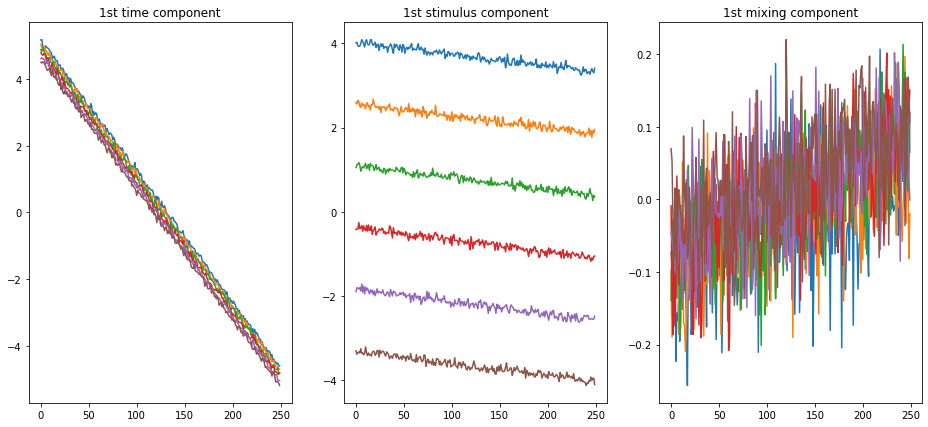

In [6]:
time = arange(T)

figure(figsize=(16,7))
subplot(131)

for s in range(S):
    plot(time,ZZ['t'][0,s])

title('1st time component')
    
subplot(132)

for s in range(S):
    plot(time,ZZ['s'][0,s])
    
title('1st stimulus component')
    
subplot(133)

for s in range(S):
    plot(time,ZZ['st'][0,s])
    
title('1st mixing component')
show()

In [7]:
print(Ee_dpca.total_time)

2.3039019107818604


In [4]:
%pylab inline
from numpy import *
from numpy.random import rand, randn, randint
from dPCA import dPCA
# sys.path.append('../ee_dpca.py');
import ee_dpca

Populating the interactive namespace from numpy and matplotlib


We first build surrogate data to apply dPCA to.

In [5]:
# number of neurons, time-points and stimuli
N,T,S = 100,250,6

# noise-level and number of trials in each condition
noise, n_samples = 0.2, 10

# build two latent factors
zt = (arange(T)/float(T))
zs = (arange(S)/float(S))

# build trial-by trial data
trialR = noise*randn(n_samples,N,S,T)
trialR += randn(N)[None,:,None,None]*zt[None,None,None,:]
trialR += randn(N)[None,:,None,None]*zs[None,None,:,None]

# trial-average data
R = mean(trialR,0)

# center data
R -= mean(R.reshape((N,-1)),1)[:,None,None]


We then instantiate a dPCA model where the two parameter axis are labeled by 's' (stimulus) and 't' (time) respectively. We set regularizer to 'auto' to optimize the regularization parameter when we fit the data.

In [6]:
dpca = dPCA.dPCA(labels='st',regularizer='auto')
dpca.protect = ['t']

You chose to determine the regularization parameter automatically. This can
                    take substantial time and grows linearly with the number of crossvalidation
                    folds. The latter can be set by changing self.n_trials (default = 3). Similarly,
                    use self.protect to set the list of axes that are not supposed to get to get shuffled
                    (e.g. upon splitting the data into test- and training, time-points should always
                    be drawn from the same trial, i.e. self.protect = ['t']). This can significantly
                    speed up the code.


In [7]:
'''dpca_list=[]
dpca_explained_var=[]
for i in range (15):
    print(i)
    dd = dPCA.dPCA(labels='st',regularizer=None,n_components=i+1)
    dd.protect = ['t']
    ZZ = dd.fit_transform(R,trialR)
    dpca_explained_var.append(dd.explained_variance_ratio_)

print(dpca_explained_var)'''


    

"dpca_list=[]\ndpca_explained_var=[]\nfor i in range (15):\n    print(i)\n    dd = dPCA.dPCA(labels='st',regularizer=None,n_components=i+1)\n    dd.protect = ['t']\n    ZZ = dd.fit_transform(R,trialR)\n    dpca_explained_var.append(dd.explained_variance_ratio_)\n\nprint(dpca_explained_var)"

In [8]:
'''import matplotlib.pyplot as plt
label = np.arange(1,16)
s_dpca_list=[]
t_dpca_list=[]
st_dpca_list=[]
for i in dpca_explained_var:
    s_dpca_list.append(sum(i['s']))
    t_dpca_list.append(sum(i['t']))
    st_dpca_list.append(sum(i['st']))
d = []
for i in range(0, len(s_list)):
    sum = s_dpca_list[i] + t_dpca_list[i]
    d.append(sum)

p1 = plt.bar(label, s_dpca_list, width=0.45, color='blue',label='s')  
p2 = plt.bar(label, t_dpca_list, width=0.45, bottom=s_dpca_list,color='green',label='t')  
p3 = plt.bar(label, st_dpca_list, width=0.45, bottom=d,color='red',label='st') 
plt.show()'''

"import matplotlib.pyplot as plt\nlabel = np.arange(1,16)\ns_dpca_list=[]\nt_dpca_list=[]\nst_dpca_list=[]\nfor i in dpca_explained_var:\n    s_dpca_list.append(sum(i['s']))\n    t_dpca_list.append(sum(i['t']))\n    st_dpca_list.append(sum(i['st']))\nd = []\nfor i in range(0, len(s_list)):\n    sum = s_dpca_list[i] + t_dpca_list[i]\n    d.append(sum)\n\np1 = plt.bar(label, s_dpca_list, width=0.45, color='blue',label='s')  \np2 = plt.bar(label, t_dpca_list, width=0.45, bottom=s_dpca_list,color='green',label='t')  \np3 = plt.bar(label, st_dpca_list, width=0.45, bottom=d,color='red',label='st') \nplt.show()"

In [9]:
'''ee_dpca_plot = []
# print(len(s_list))
for i in range(0,15):
    res = s_list[i]+t_list[i]+st_list[i]
    ee_dpca_plot.append(res)

e1 = plt.plot(label, ee_dpca_plot,'s-', color='blue',label = 'ee-dpca',
)

dpca_plot = []
for i in range(0,15):
    res = s_dpca_list[i]+t_dpca_list[i]+st_dpca_list[i]
    dpca_plot.append(res)

e2 = plt.plot(label, dpca_plot, 'o-',color='red',label = 'dpca')'''

"ee_dpca_plot = []\n# print(len(s_list))\nfor i in range(0,15):\n    res = s_list[i]+t_list[i]+st_list[i]\n    ee_dpca_plot.append(res)\n\ne1 = plt.plot(label, ee_dpca_plot,'s-', color='blue',label = 'ee-dpca',\n)\n\ndpca_plot = []\nfor i in range(0,15):\n    res = s_dpca_list[i]+t_dpca_list[i]+st_dpca_list[i]\n    dpca_plot.append(res)\n\ne2 = plt.plot(label, dpca_plot, 'o-',color='red',label = 'dpca')"

Now fit the data (R) using the model we just instatiated. Note that we only need trial-to-trial data when we want to optimize over the regularization parameter.

In [10]:
Z = dpca.fit_transform(R,trialR)

OMG,Start optimizing regularization.
Starting trial  1 / 3
Starting trial  2 / 3
Starting trial  3 / 3
scores {'s': array([[  112.23923557,   112.23921099,   112.23916279,   112.23906834,
          112.23888321,   112.23852037,   112.23780927,   112.23641578,
          112.23368551,   112.22833793,   112.2178711 ,   112.1974113 ,
          112.15752083,   112.08013557,   111.93146427,   111.65110752,
          111.14058098,   110.26789877,   108.92861986,   107.19201199,
          105.4185223 ,   104.11222206,   103.6154972 ,   104.1186107 ,
          106.07037056,   110.90618364,   122.83095016,   154.32710584,
          242.73800712,   492.78785844,  1148.62819042,  2596.02370988,
         5056.27061765,  8127.89858115, 10983.15406775, 13084.79219595,
        14405.6923265 , 15160.37575782, 15569.1067252 , 15784.20911691,
        15895.7210693 , 15953.08235324, 15982.47104   , 15997.49735502,
        16005.17221356],
       [  113.56700737,   113.56697791,   113.56692018,   113.56680

In [14]:
print(R.shape)
print(Z['s'].shape)

(100, 6, 250)
(10, 6, 250)


In [15]:
print(dpca.total_time)
print(Z['t'].shape)

2.1038341522216797
(10, 6, 250)


In [16]:
print(Z['t'][0,1].shape)

(250,)


(250,)
(250,)
(250,)
(250,)
(250,)
(250,)
(250,)


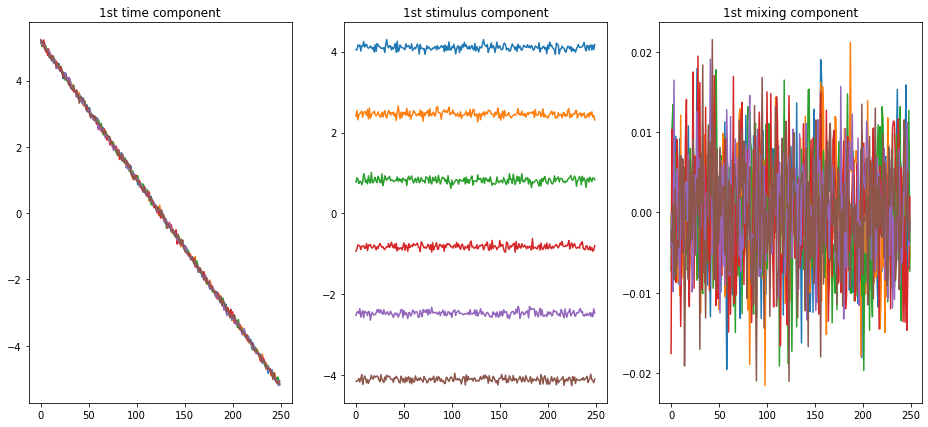

In [17]:
time = arange(T)
print(time.shape)
figure(figsize=(16,7))
subplot(131)

for s in range(S):
    plot(time,Z['t'][0,s])
    print(Z['t'][0,s].shape)

title('1st time component')
    
subplot(132)

for s in range(S):
    plot(time,Z['s'][0,s])
    
title('1st stimulus component')
    
subplot(133)

for s in range(S):
    plot(time,Z['st'][0,s])
    
title('1st mixing component')
show()

In [18]:
print(time.shape)
print(Z['s'][0,1].shape)

(250,)
(250,)


The 1st mixing component looks merely like noise. But to be sure, we can run a significance analysis:

In [19]:
significance_masks = dpca.significance_analysis(R,trialR,axis='t',n_shuffles=10,n_splits=10,n_consecutive=10)

Compute score of data:  . . . . . . . . . . Finished.
Compute score of shuffled data:  9 / 10 . . . . . . . . . . 

We can highlight the significant parts of the demixed components with a black bar underneath. Note that there is no significant analysis time, since there are no classes to compute the significance over.

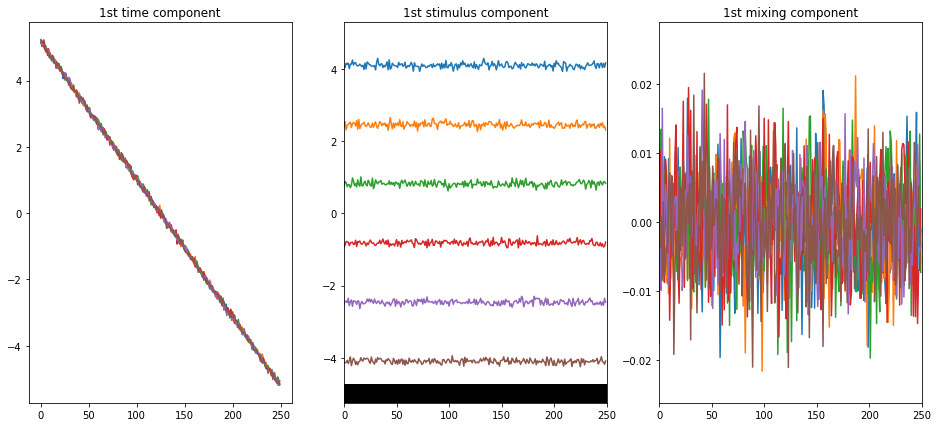

In [20]:
time = arange(T)

figure(figsize=(16,7))
subplot(131)

for s in range(S):
    plot(time,Z['t'][0,s])

title('1st time component')
    
subplot(132)

for s in range(S):
    plot(time,Z['s'][0,s])

imshow(significance_masks['s'][0][None,:],extent=[0,250,amin(Z['s'])-1,amin(Z['s'])-0.5],aspect='auto',cmap='gray_r',vmin=0,vmax=1)
ylim([amin(Z['s'])-1,amax(Z['s'])+1])

title('1st stimulus component')
    
subplot(133)

for s in range(S):
    plot(time,Z['st'][0,s])

dZ = amax(Z['st'])-amin(Z['st'])
imshow(significance_masks['st'][0][None,:],extent=[0,250,amin(Z['st'])-dZ/10.,amin(Z['st'])-dZ/5.],aspect='auto',cmap='gray_r',vmin=0,vmax=1)
ylim([amin(Z['st'])-dZ/10.,amax(Z['st'])+dZ/10.])
    
title('1st mixing component')
show()

In [21]:
from multiprocessing import Pool
import numpy as np
import time
def work(x,y):
    return x.all()*y
start = time.time()
pool = Pool(4) 
x = np.array([1,2,3,4,5])
y = np.array(5)
z = [y]
print(type(z))
results = np.array(pool.starmap(work, zip(x,z)))
end = time.time()
total = end - start
print(type(results))
print(results)
print(total)


<class 'list'>
<class 'numpy.ndarray'>
[5]
0.019370079040527344


In [22]:
import numpy as np
trail_data=np.load('./ElectricityUsage.npy',encoding = "latin1")

In [23]:
print(R.shape)
print(trialR.shape)

(100, 6, 250)
(10, 100, 6, 250)


In [24]:
n_samples = 3
data = mean(trail_data,0)
N = 12
print(data.shape)
print(trail_data.shape)
data -= mean(data.reshape((N,-1)),-1)[:,None,None,None]
# print(data)

(12, 20, 96, 370)
(3, 12, 20, 96, 370)


In [25]:
data = data.transpose(3,1,2,0)
print(data.shape)

(370, 20, 96, 12)


In [26]:
# regularize
import sklearn.preprocessing
scaler = sklearn.preprocessing.MinMaxScaler()
for i in range(12):
    for j in range(20):
        data[i][j] = scaler.fit_transform(data[i][j])

In [27]:
dpca_ex=dPCA.dPCA(labels='mdic',regularizer=None)
Z_ex=dpca_ex.fit_transform(data,trail_data)

In [28]:
print(Z_ex['m'].shape)

(10, 20, 96, 370)


In [ ]:
print(type(Z_ex['m']))

[0.045343015, 2.9170683e-06, 144.54016, 9.189275, 27.63473]


([<matplotlib.patches.Wedge at 0x7f8144374150>,
 [Text(-0.039999525221431576, 1.498790736684795, 'month'),
  Text(-0.03999810076384058, 1.4975813963193416, 'day'),
  Text(2.7380531070827705, 0.5841263711391743, 'time interval'),
  Text(0.8238917284177528, 2.883646488485432, 'client'),
  Text(0.13301198792196822, 2.209185289494185, 'else')],
 [Text(0.6600002589701283, 1.49934040182807, '0.02%'),
  Text(0.6600010359469961, 1.4986807616287319, '0.00%'),
  Text(2.17530169477242, 1.0004325660759132, '79.68%'),
  Text(1.131213670046047, 2.254716266446599, '5.07%'),
  Text(0.7543701752301645, 1.8868283397241008, '15.23%')])

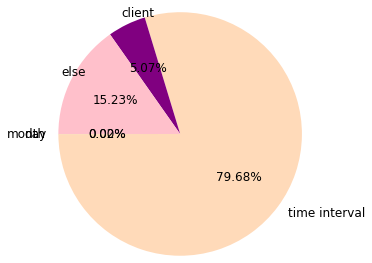

In [38]:
import matplotlib.pyplot as plt
exv_ex = dpca_ex.explained_variance_ratio_
m=sum(exv_ex['m'])
d=sum(exv_ex['d'])
i=sum(exv_ex['i'])
c=sum(exv_ex['c'])
else_ele=sum(exv_ex['md']+exv_ex['mi']+exv_ex['mc']+exv_ex['di']+exv_ex['dc']+exv_ex['ic']+exv_ex['mdi']+exv_ex['mdc']+exv_ex['mic']+exv_ex['dic']+exv_ex['mdic'])
data_list = [m,d,i,c,else_ele]
print(data_list)
labels=['month','day','time interval','client','else']
# colors=['#9999ff','#ff9999','#7777aa','#2442aa','#dd5555']
colors=['yellowgreen','lightskyblue','peachpuff','purple','pink']
plt.axes(aspect='equal')
plt.pie(x = data_list, 
        labels=labels, 
        colors=colors,
        autopct='%.2f%%',
        startangle = 180,
        textprops = {'fontsize':12, 'color':'k'},
        center = (1.5,1.5),
        radius = 1.4)


In [33]:
explained_var_dpca=sum(data_list)
print(data_list)
print(explained_var_dpca)

[0.045343015, 2.9170683e-06, 144.54016, 9.189275, 27.63473]
181.40952


In [31]:
ee_dpca_ex=ee_dpca.EE_dPCA(labels='mdic',rho=8e-3, hyper_lamb=1e-4,hyper_tau=1e-3, regularizer=None)
ZZ_ex=ee_dpca_ex.fit_transform(data,trail_data)


original X.shape (12, 20, 96, 370)
lambda 0.0001 tau 0.001
key m
key d
key i
key c
key md
key mi
key mc
key di
key dc
key ic
key mdi
key mdc
key mic
key dic
key mdic


In [30]:
ee_exv_ex = ee_dpca_ex.explained_variance_ratio_
ee_m=sum(ee_exv_ex['m'])
ee_d=sum(ee_exv_ex['d'])
ee_i=sum(ee_exv_ex['i'])
ee_c=sum(ee_exv_ex['c'])
ee_else=sum(ee_exv_ex['md'])+sum(ee_exv_ex['mi'])+sum(ee_exv_ex['mc'])+sum(ee_exv_ex['di'])+sum(ee_exv_ex['dc'])+sum(ee_exv_ex['ic'])+sum(ee_exv_ex['mdi'])+sum(ee_exv_ex['mdc'])+sum(ee_exv_ex['mic'])+sum(ee_exv_ex['dic'])+sum(ee_exv_ex['mdic'])
ee_data_list = [ee_m,ee_d,ee_i,ee_c,ee_else]
print(ee_data_list)
labels=['month','day','time interval','client','else']
# colors=['#9999ff','#ff9999','#7777aa','#2442aa','#dd5555']
colors = ['yellowgreen','lightskyblue','peachpuff','purple','pink']

plt.axes(aspect='equal')
plt.pie(x = ee_data_list, 
        labels=labels, 
        colors=colors,
        autopct='%.2f%%',
        startangle = 180,
        radius = 1.4,
        textprops = {'fontsize':12, 'color':'k'},
        center = (1.5,1.5) )

NameError: name 'ee_dpca_ex' is not defined

In [34]:
ee_explained_var_dpca=sum(ee_data_list)
print(ee_data_list)
print(ee_explained_var_dpca)

[0.00732569111344812, 7.425463000666676e-07, 134.43818181434165, 7.850798530063434, 11.15598255215439]
153.45228933021923


In [11]:
import numpy as np
a = np.logspace(0,30,num=30,base=1.4,endpoint=False)*1e-5
print(a)

[1.00000000e-05 1.40000000e-05 1.96000000e-05 2.74400000e-05
 3.84160000e-05 5.37824000e-05 7.52953600e-05 1.05413504e-04
 1.47578906e-04 2.06610468e-04 2.89254655e-04 4.04956517e-04
 5.66939124e-04 7.93714773e-04 1.11120068e-03 1.55568096e-03
 2.17795334e-03 3.04913467e-03 4.26878854e-03 5.97630396e-03
 8.36682554e-03 1.17135558e-02 1.63989781e-02 2.29585693e-02
 3.21419970e-02 4.49987958e-02 6.29983141e-02 8.81976398e-02
 1.23476696e-01 1.72867374e-01]
